# Azure Demand Forecasting
## Notebook 02: Data Cleaning and Merging
### Milestone 1: Data Collection & Preparation


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the dataset and formating the date column to standard date column 

In [39]:
# Create figures folder if it does not exist
figures_dir = '../reports/visualized_figures'
os.makedirs(figures_dir, exist_ok=True)

# Load datasets using relative path from notebooks folder
azure_df = pd.read_csv('../data/raw/azure_usage.csv')
external_df = pd.read_csv('../data/raw/external_factors.csv')

# Convert 'date' columns to datetime for merging and time series analysis
azure_df['date'] = pd.to_datetime(azure_df['date'])
external_df['date'] = pd.to_datetime(external_df['date'])


## Data Quality Checks

In [40]:
print("Missing values in Azure usage data:")
print(azure_df.isnull().sum())

print("Missing values in External factors data:")
print(external_df.isnull().sum())


### Handling Missing Values - Missing values found in `usage_storage` will be filled using forward fill method.

if azure_df['usage_storage'].isnull().any():
    azure_df['usage_storage'] = azure_df['usage_storage'].fillna(method='ffill')
    print("Filled missing values in 'usage_storage' using forward fill.")
else:
    print("No missing values in 'usage_storage' to fill.")


Missing values in Azure usage data:
date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64
Missing values in External factors data:
date                   0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64
No missing values in 'usage_storage' to fill.


## Merging Datasets


In [41]:
# Merge on date with left join to keep all usage records
merged_df = pd.merge(azure_df, external_df, on='date', how='left')

# Show the first few rows of merged data to verify
merged_df.head()


,date,region,resource_type,usage_cpu,usage_storage,users_active,economic_index,cloud_market_demand,holiday
0,2023-01-01,East US,VM,88,1959,470,104.97,0.99,1
1,2023-01-01,East US,Storage,92,1595,388,104.97,0.99,1
2,2023-01-01,East US,Container,70,621,414,104.97,0.99,1
3,2023-01-01,West US,VM,60,1982,287,104.97,0.99,1
4,2023-01-01,West US,Storage,85,1371,351,104.97,0.99,1


## 5. 📈 Visualizations
- Total CPU usage trend over time  


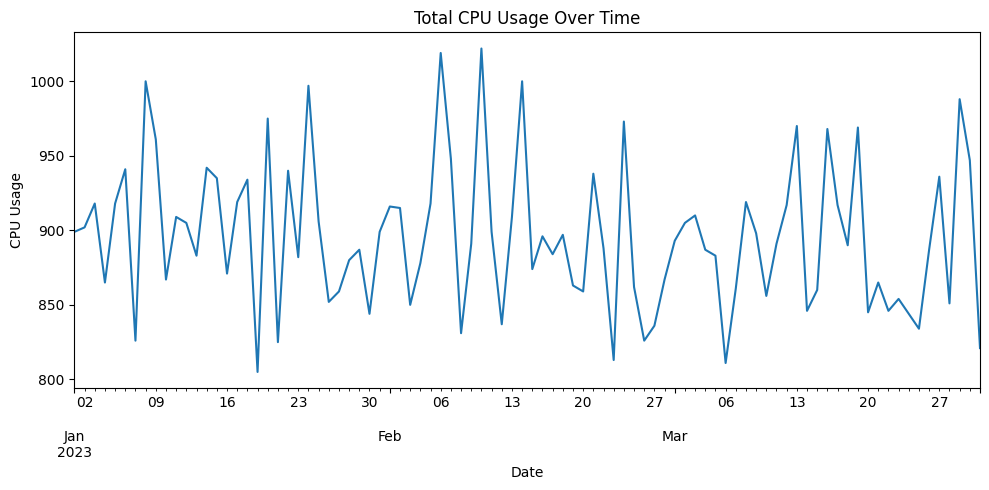

Saved total CPU usage over time plot


In [42]:
plt.figure(figsize=(10, 5))
merged_df.groupby('date')['usage_cpu'].sum().plot()
plt.title("Total CPU Usage Over Time")
plt.xlabel("Date")
plt.ylabel("CPU Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/total_cpu_usage_over_time.png')
plt.show()
plt.close()
print("Saved total CPU usage over time plot")

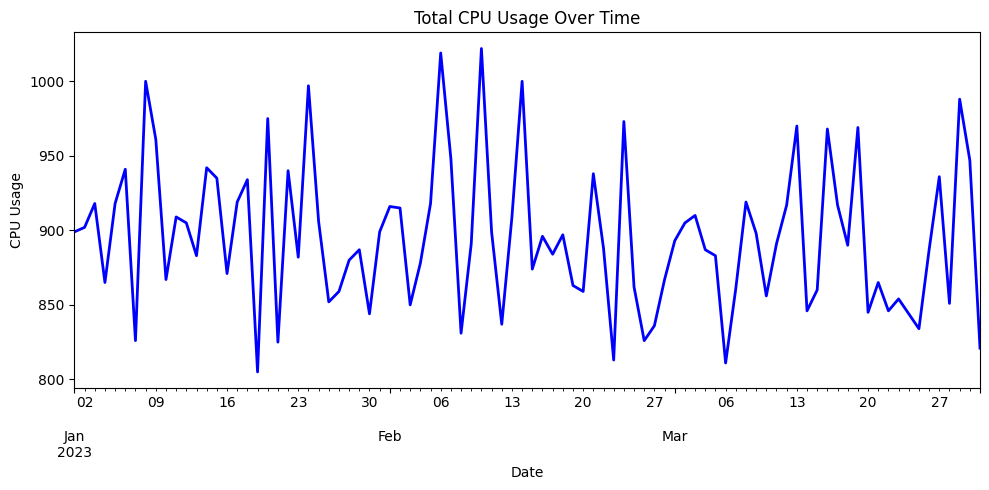

Saved total CPU usage over time plot


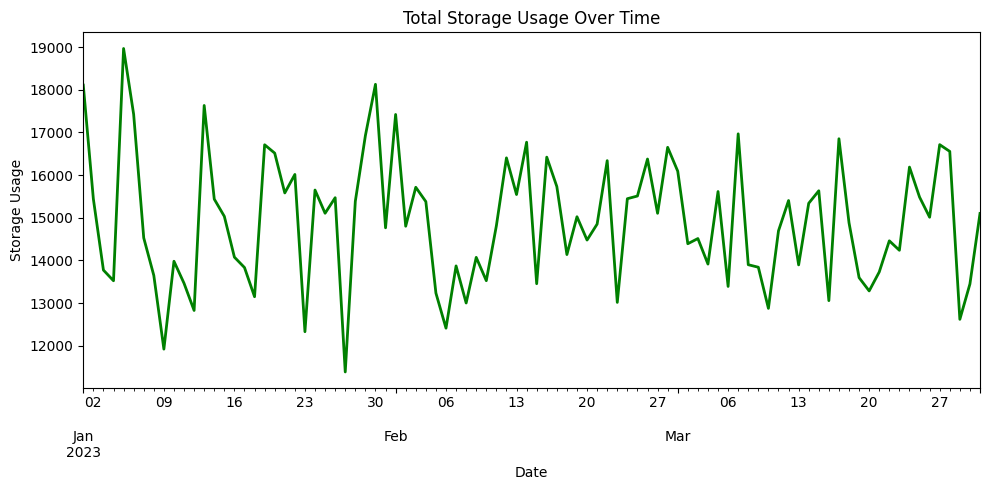

Saved total storage usage over time plot


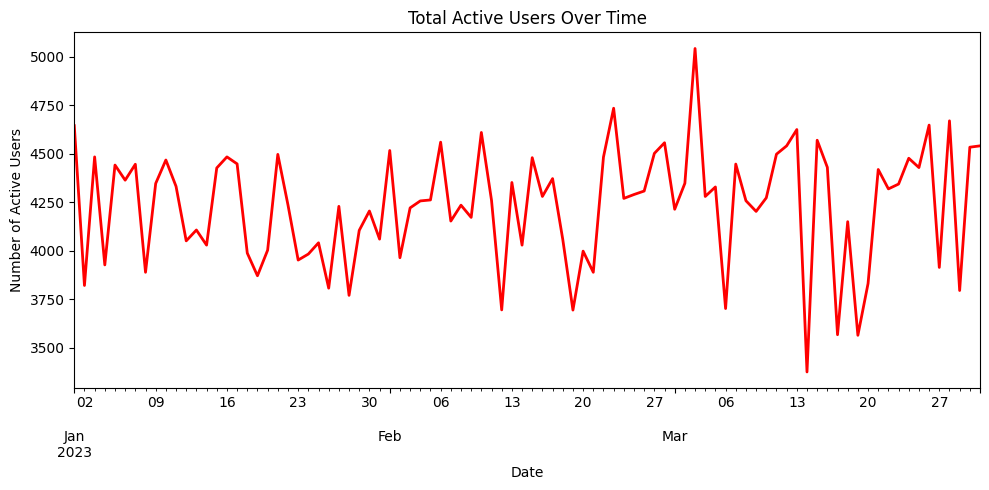

Saved total active users over time plot


In [43]:

# Plot 1: Total CPU Usage Over Time
plt.figure(figsize=(10, 5))
merged_df.groupby('date')['usage_cpu'].sum().plot(color='blue', linewidth=2)
plt.title("Total CPU Usage Over Time")
plt.xlabel("Date")
plt.ylabel("CPU Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/total_cpu_usage_over_time.png')
plt.show()
plt.close()
print("Saved total CPU usage over time plot")

# Plot 2: Total Storage Usage Over Time
plt.figure(figsize=(10, 5))
merged_df.groupby('date')['usage_storage'].sum().plot(color='green', linewidth=2)
plt.title("Total Storage Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Storage Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/total_storage_usage_over_time.png')
plt.show()
plt.close()
print("Saved total storage usage over time plot")

# Plot 3: Total Active Users Over Time
plt.figure(figsize=(10, 5))
merged_df.groupby('date')['users_active'].sum().plot(color='red', linewidth=2)
plt.title("Total Active Users Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Active Users")
plt.tight_layout()
plt.savefig(f'{figures_dir}/total_active_users_over_time.png')
plt.show()
plt.close()
print("Saved total active users over time plot")


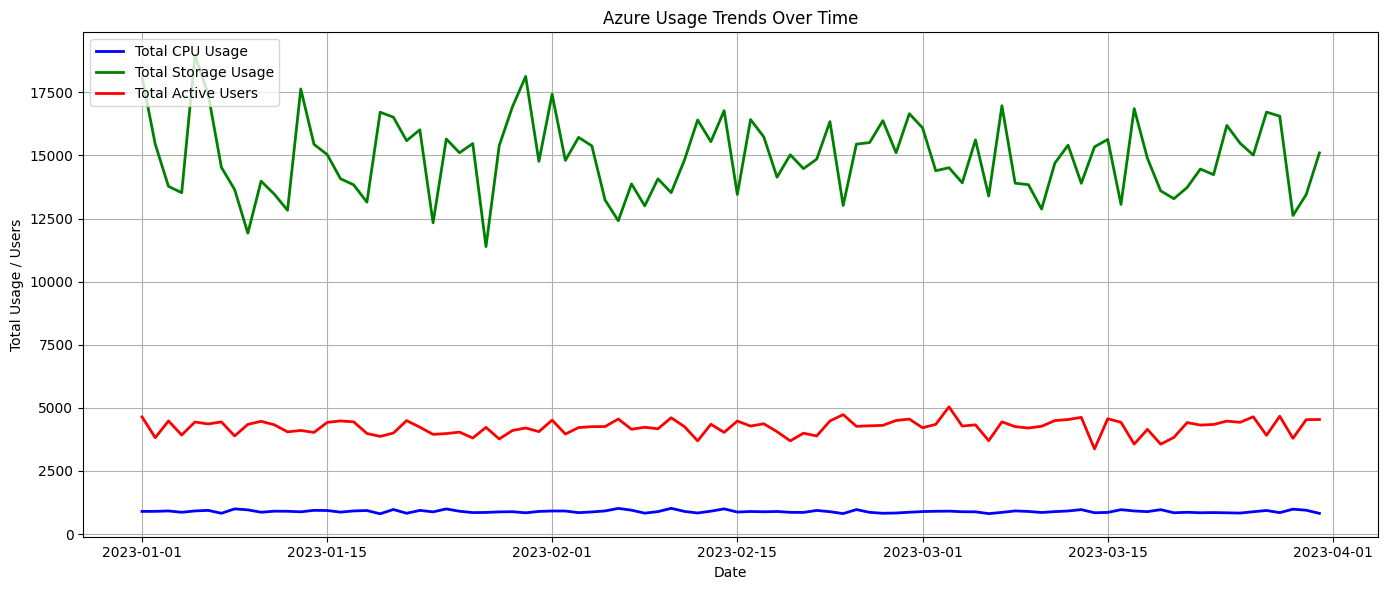

Saved combined usage trends plot


In [44]:

plt.figure(figsize=(14, 6))

# Plot Total CPU Usage
plt.plot(merged_df.groupby('date')['usage_cpu'].sum(), label='Total CPU Usage', color='blue', linewidth=2)

# Plot Total Storage Usage
plt.plot(merged_df.groupby('date')['usage_storage'].sum(), label='Total Storage Usage', color='green', linewidth=2)

# Plot Total Active Users
plt.plot(merged_df.groupby('date')['users_active'].sum(), label='Total Active Users', color='red', linewidth=2)

plt.title('Azure Usage Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Usage / Users')
plt.legend(loc='upper left')

plt.grid(True)
plt.tight_layout()

# Save combined plot
plt.savefig(f'{figures_dir}/combined_usage_trends.png')

plt.show()
plt.close()

print("Saved combined usage trends plot")


- Plot region-wise average CPU usage bar chart and save

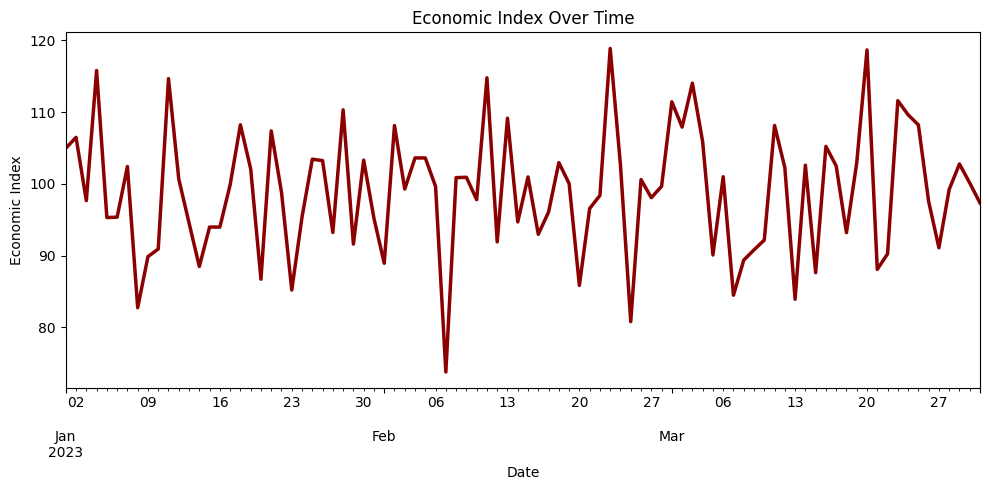

Saved economic index over time plot


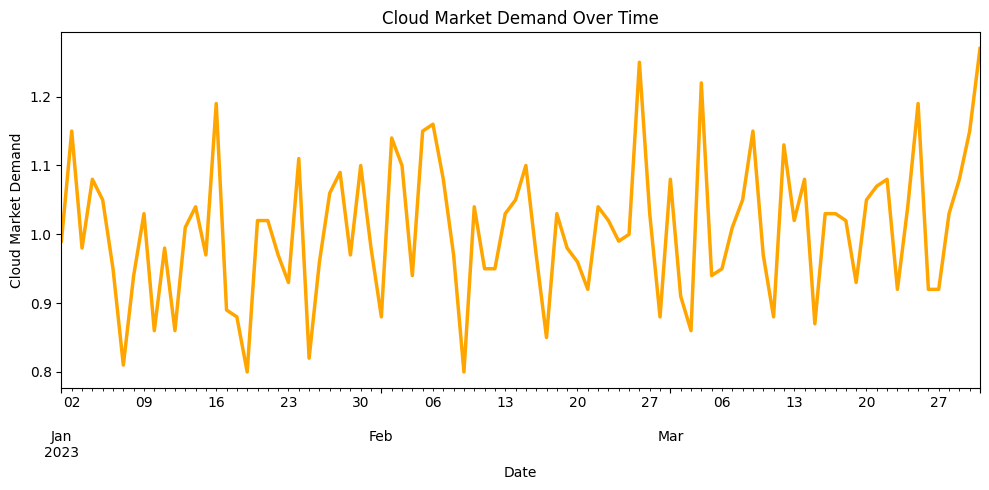

Saved cloud market demand over time plot


In [45]:

# Economic Index Over Time
plt.figure(figsize=(10, 5))
ax1 = external_df.groupby('date')['economic_index'].mean().plot(color='darkblue', linewidth=2)
plt.title("Economic Index Over Time")
plt.xlabel("Date")
plt.ylabel("Economic Index")

# Highlight trend line with a thicker, colored plot (e.g., red)
ax1.lines[0].set_linewidth(2.5)
ax1.lines[0].set_color('darkred')

plt.tight_layout()
plt.savefig(f'{figures_dir}/economic_index_over_time.png')
plt.show()
plt.close()
print("Saved economic index over time plot")


# Cloud Market Demand Over Time
plt.figure(figsize=(10, 5))
ax2 = merged_df.groupby('date')['cloud_market_demand'].mean().plot(color='darkgreen', linewidth=2)
plt.title("Cloud Market Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Cloud Market Demand")

# Highlight trend line with a thicker, distinct colored plot (e.g., orange)
ax2.lines[0].set_linewidth(2.5)
ax2.lines[0].set_color('orange')

plt.tight_layout()
plt.savefig(f'{figures_dir}/cloud_market_demand_over_time.png')
plt.show()
plt.close()
print("Saved cloud market demand over time plot")


- Plot region-wise average CPU usage bar chart and save

C:\Users\mahem\AppData\Local\Temp\ipykernel_26748\862413530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_avg, x='region', y='usage_cpu',palette='viridis')


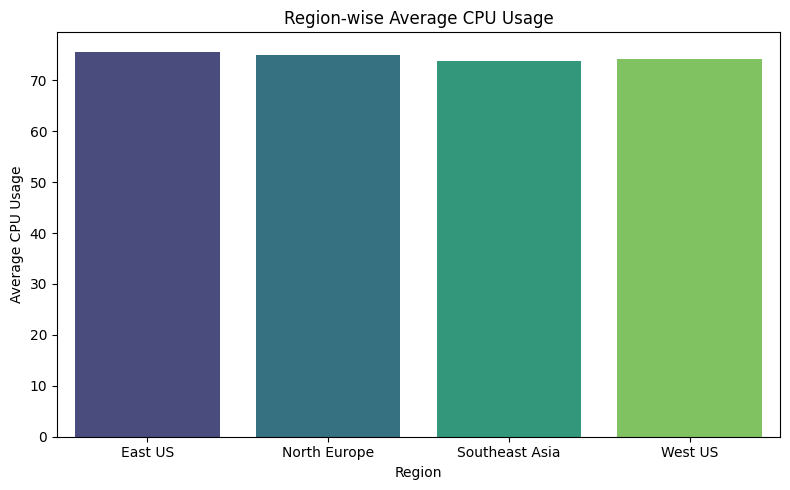

Saved region-wise average CPU usage plot


In [46]:
plt.figure(figsize=(8,5))
region_avg = azure_df.groupby('region')['usage_cpu'].mean().reset_index()
sns.barplot(data=region_avg, x='region', y='usage_cpu',palette='viridis')
plt.title("Region-wise Average CPU Usage")
plt.xlabel("Region")
plt.ylabel("Average CPU Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/avg_cpu_usage_by_region.png')
plt.show()
plt.close()
print("Saved region-wise average CPU usage plot")


C:\Users\mahem\AppData\Local\Temp\ipykernel_26748\865737577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=region_avg, x='region', y='usage_cpu', palette='viridis')


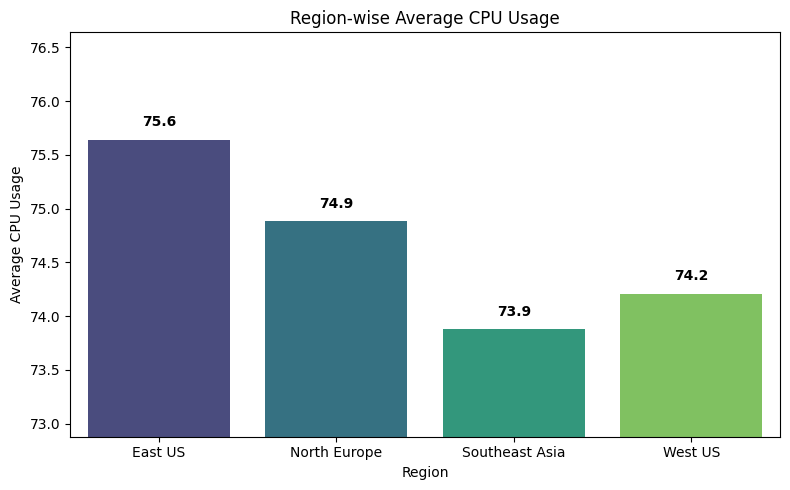

Saved improved region-wise average CPU usage plot


In [47]:
plt.figure(figsize=(8,5))
region_avg = azure_df.groupby('region')['usage_cpu'].mean().reset_index()
ax = sns.barplot(data=region_avg, x='region', y='usage_cpu', palette='viridis')

# Focus Y-axis on actual data range
min_val = region_avg['usage_cpu'].min()
max_val = region_avg['usage_cpu'].max()
plt.ylim(min_val - 1, max_val + 1)

# Add value labels on bars
for i, v in enumerate(region_avg['usage_cpu']):
    ax.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title("Region-wise Average CPU Usage")
plt.xlabel("Region")
plt.ylabel("Average CPU Usage")
plt.tight_layout()
plt.savefig(f'{figures_dir}/avg_cpu_usage_by_region.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print("Saved improved region-wise average CPU usage plot")


- Plot correlation heatmap and save

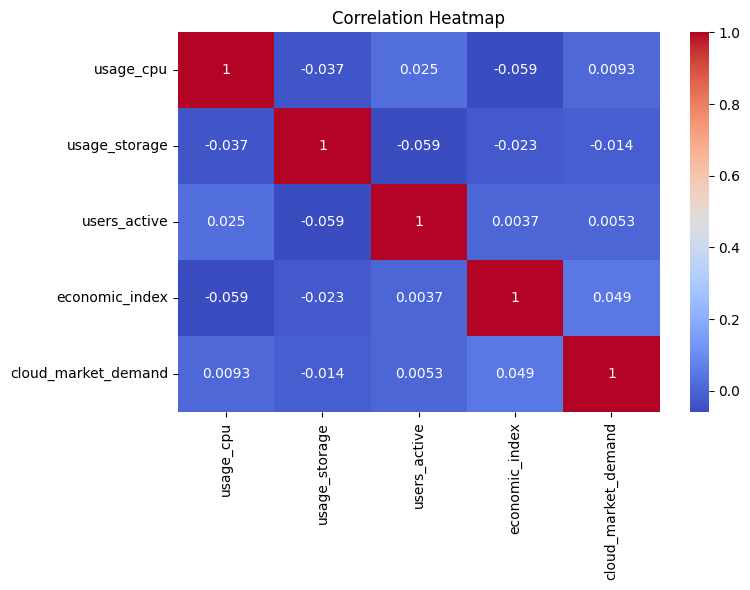

Saved correlation heatmap


In [48]:
plt.figure(figsize=(8,6))
corr_cols = ['usage_cpu', 'usage_storage', 'users_active', 'economic_index', 'cloud_market_demand']
sns.heatmap(merged_df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f'{figures_dir}/correlation_heatmap.png')
plt.show()
plt.close()
print("Saved correlation heatmap")


## Save Cleaned and Merged Dataset


In [49]:
# Create processed directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save merged data to CSV file for downstream tasks
merged_df.to_csv('../data/processed/cleaned_merged.csv', index=False)
print('Cleaned and merged dataset saved to data/processed/cleaned_merged.csv')


Cleaned and merged dataset saved to data/processed/cleaned_merged.csv


In [50]:
from PIL import Image

# Absolute paths to the images in your folder
base_path = r'D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/reports/visualized_figures'

img_users_active = f'{base_path}\\total_active_users_over_time.png'
img_usage_cpu = f'{base_path}\\total_cpu_usage_over_time.png'
img_usage_storage = f'{base_path}\\total_storage_usage_over_time.png'

# Open images
img1 = Image.open(img_users_active)
img2 = Image.open(img_usage_cpu)
img3 = Image.open(img_usage_storage)

# Resize images in second row to have the same height if needed
height_row2 = min(img2.height, img3.height)
img2 = img2.resize((int(img2.width * height_row2 / img2.height), height_row2))
img3 = img3.resize((int(img3.width * height_row2 / img3.height), height_row2))

# Determine combined image dimensions
combined_width = max(img1.width, img2.width + img3.width)
combined_height = img1.height + height_row2

# Create blank white image canvas
combined_img = Image.new('RGB', (combined_width, combined_height), color='white')

# Paste first row (users_active), centered horizontally
x_offset_img1 = (combined_width - img1.width) // 2
combined_img.paste(img1, (x_offset_img1, 0))

# Paste second row (usage_cpu and usage_storage side by side)
combined_img.paste(img2, (0, img1.height))
combined_img.paste(img3, (img2.width, img1.height))

# Save and display combined image
combined_img.save(f'{base_path}\\combined_trends_layout.png')
combined_img.show()


In [ ]:
from PIL import Image

# Absolute paths to the images in your folder
base_path = r'D:/infosysspringboard projects/project1-1stmilestine/AZURE_BACKEND_TEAM-B/reports/visualized_figures'

img_economic_index = f'{base_path}\\economic_index_over_time.png'
img_cloud_market_demand = f'{base_path}\\cloud_market_demand_over_time.png'

# Open images
img1 = Image.open(img_economic_index)
img2 = Image.open(img_cloud_market_demand)

# Make both images the same width (optional)
common_width = max(img1.width, img2.width)
if img1.width != common_width:
    img1 = img1.resize((common_width, int(img1.height * common_width / img1.width)))
if img2.width != common_width:
    img2 = img2.resize((common_width, int(img2.height * common_width / img2.width)))

# Calculate total height for the combined image
combined_height = img1.height + img2.height

# Create new white image to stack the two vertically
combined_img = Image.new('RGB', (common_width, combined_height), color='white')

# Paste images one below the other
combined_img.paste(img1, (0, 0))
combined_img.paste(img2, (0, img1.height))

# Save and/or show the combined image
combined_img.save(f'{base_path}\\combined_economic_market.png')
combined_img.show()
